In [1]:
from sim_models import run_ll_abm, run_ll_abm_fx, simulate_leadership_statistics_no_tariff, run_ll_abm_fx_with_tariff, run_ll_abm_fx_with_dynamic_tariff, simulate_leadership_statistics_tariff, plot_comparative_distributions

# International Agent-Based Model (ABM) Presentation
*Llerena & Lorentz (2004) Replication & Extensions: FX, Tariffs, Regime Persistence*

---

## Contents

1. [Introduction & Motivation](#1-introduction--motivation)
2. [Baseline Model Logic and Main Equations](#2-baseline-model-logic-and-main-equations)
3. [Simulation Results of Single Runs](#3-simulation-results-of-single-runs)
    - 3.1 [Exchange Rate Logic and Equations](#31-exchange-rate-logic-and-equations)
    - 3.2 [Tariff Mechanism Logic and Equations](#32-tariff-mechanism-logic-and-equations)
    - 3.3 [Dynamic Tariff Mechanism Logic and Equations](#33-dynamic-tariff-mechanism-logic-and-equations)
4. [Statistical Summary of 1000 Simulations](#4-statistical-summary-of-1000-simulations)
5. [Economic Interpretation](#5-economic-interpretation)
6. [Conclusions & Next Steps](#6-conclusions--next-steps)

---

## 1. Introduction & Motivation

### Global Context and Policy Relevance

In recent years, the landscape of international trade and economic policy has shifted dramatically. The resurgence of tariffs as a primary policy tool—most notably through the “America First” doctrine under President Donald Trump—has revived debates long thought settled in mainstream economics. Influential economic advisors such as Howard Lutnick, Peter Navarro, Robert Lighthizer, Stephen Miran, and Scott Bessent have argued that tariffs are not only a means to protect domestic industry but could also serve as a strategic lever to defend (or restore) the United States’ leadership position in the global economy.

This policy turn has been echoed in other major economies, with countries considering or enacting their own forms of “defensive” economic nationalism:

- *China*: In response to US tariffs and broader geopolitical rivalry, China has both imposed retaliatory tariffs and launched major “self-reliance” campaigns—such as “Made in China 2025”—targeting advanced manufacturing, semiconductors, and green tech. China has also used tariffs and quotas to protect strategic sectors, such as rare earths and agricultural products.

- *European Union*: The EU has introduced “anti-dumping” duties on steel, solar panels, and other imports from China and elsewhere. More recently, the EU announced tariffs on Chinese electric vehicles, citing unfair state subsidies. The EU also uses “Carbon Border Adjustment Mechanisms” to level the playing field in green industries.

- *India*: India has raised tariffs on electronics, textiles, and agricultural goods as part of the “Make in India” initiative, aiming to boost domestic industry and reduce import dependency.

- *Brazil, Russia, Turkey*: These and other emerging economies have cyclically raised tariffs to defend domestic industries—often in response to currency volatility, external shocks, or global trade tensions.

While these measures often cite national security, economic resilience, or green transition as rationales, they also reflect an increasingly multipolar and interventionist global economy with the risk of tit-for-tat escalation and supply chain fragmentation. From an economic perspective, the effects of these interventions are far from settled: while some policymakers claim tariffs will stimulate domestic innovation and production, many economists warn of unintended consequences, such as retaliation, reduced global efficiency, and long-term decline in competitiveness. 

The focus of this notebook is to take the American strategic perspective and investigate whether tariffs can in fact secure or entrench a country’s leadership position in the global economy—or whether, in a dynamic world, innovation and competition ultimately undermine any such advantage.

---

### Methodological Choice: Why Use an Agent-Based Model?

Traditional macroeconomic models—such as DSGE frameworks or comparative-static trade theory—struggle to capture the rich, nonlinear, and path-dependent dynamics that characterize real-world global competition and policy shocks. Agent-based models (ABMs) offer a natural laboratory for these questions, as they explicitly represent heterogeneous agents (firms, economies), feedback loops, and emergent phenomena such as regime shifts or lock-in effects.

However, ABMs come with trade-offs. As models become more realistic, they risk becoming opaque or overly complex, making results difficult to interpret or trace back to core mechanisms. For this reason, the present project is intentionally built on a simple, transparent, and easily explainable ABM—albeit one that is somewhat dated—so that all dynamics can be understood and results remain interpretable.

This study uses the agent-based framework of Llerena & Lorentz (2004), which captures cumulative causation, endogenous innovation, and market share competition among economies and their firms (see “theory” folder). Despite its simplicity, this model reflects Schumpeterian competition: innovation races and feedback can create persistent leadership gaps. 

It is important to note, however, that the original Llerena & Lorentz (2004) model omits a number of features that are widely recognized as crucial in real-world international economics and policy debates. In particular, the core model:

- Does not include capital flows or a financial sector: There is no portfolio investment, foreign direct investment, or international lending and borrowing. This means the model cannot capture currency crises, sudden stops, or the buffering effects of global capital markets.

- Lacks an explicit exchange rate mechanism: All trade is priced in “real” terms, with no currency risk or feedback between exchange rates and competitiveness. In reality, exchange rate movements are a major channel for transmitting shocks, adjusting to imbalances, or amplifying policy effects.

- Assumes perfectly balanced trade: By construction, each economy’s exports always equal its imports in every period. This eliminates persistent current account deficits/surpluses, trade imbalances, and related dynamics that are central to debates about global rebalancing and economic power.

- Omits policy retaliation and dynamic countermeasures: There is no endogenous response from economies targeted by tariffs—no retaliatory tariffs, subsidy races, or trade alliances. This excludes escalation dynamics that often define real-world trade disputes.

- Does not model endogenous network formation or supply chain complexity: The model abstracts from the global value chain structure, supplier-customer linkages, and the propagation of shocks through production networks.

- Lacks micro-level labor market frictions and household heterogeneity: Employment, wage formation, and income distribution effects of trade and policy are not explicitly modeled.

While these omissions make the model highly transparent and analytically tractable, they also limit its ability to fully represent the channels through which trade policy and innovation races affect modern, interconnected economies. Where possible, this notebook adds selected extensions—such as endogenous exchange rates and dynamic tariffs—to bridge some of these gaps, while leaving others as avenues for future research and model development.

---

## Theoretical Foundation: Llerena & Lorentz (2004)

This project builds upon the influential agent-based model developed by Llerena & Lorentz (2004), which explores the dynamics of cumulative causation and evolutionary technical change in a multi-country context. The model is grounded in Schumpeterian and evolutionary economic theory, emphasizing how innovation, market selection, and feedback processes drive persistent differences in economic performance across countries and firms.

### Core Model Structure

- Heterogeneous Firms: Each economy is composed of multiple firms that differ in productivity, innovation rates, and investment behavior.

- Endogenous Innovation: Firms can improve their productivity through stochastic R&D investments. Successful innovation increases their competitiveness and market share.

- Market Competition: Firms compete for global market shares based on their relative competitiveness, which depends on price, productivity, and wage costs.

- Cumulative Causation: Positive feedback mechanisms mean that successful firms accumulate greater profits, which fund further investment and innovation, amplifying initial advantages—a mechanism echoing the work of Myrdal and Kaldor.

- Replicator Dynamics: Market shares evolve according to a replicator equation, such that firms with above-average competitiveness grow, while those with below-average competitiveness shrink.

### Model Assumptions and Baseline Constraints

- Closed Trade Loop: Imports and exports are always balanced at the economy level; there are no persistent trade imbalances.

- No Financial Sector: Capital flows, credit markets, and foreign direct investment are excluded.

- No Exchange Rates: All transactions are denominated in real terms; currency dynamics are absent.

- No Retaliatory Policy: Tariffs or other policy interventions are unilateral and not met with countermeasures by other economies.

- No Supply Chains or Network Effects: Trade occurs in aggregated goods without explicit supplier-customer linkages or propagation of shocks.

**Modeling Note**:  

1. While the model in Llerena & Lorentz (2004) includes an entry and exit rule—where firms with market share below a threshold are replaced by new firms initialized at economy averages—this notebook departs from that approach. In evolutionary macroeconomic models, “zombie” or nearly inactive firms (those with near-zero market share) are a natural outcome of competition. Allowing such firms to persist, rather than replacing them with new average entrants, better represents the cumulative, path-dependent processes found in real economies and aligns with the Schumpeterian concept of creative destruction. Actual entry in real economies involves costs, risk, and disadvantage; by omitting the statistical reset mechanism, the model better captures the inertia observed in mature markets and avoids artificial homogenization.

2. The Parameter selection will copy those of the original paper, however, $\gamma$, which controls the extent to which productivity growth translates into wage growth will be set at the value of 0.95, implying that 5% of earnings will be allocated to R&D.


---



### Relevance and Value

Despite its relative simplicity, the Llerena & Lorentz model provides a powerful lens for studying how local shocks, innovation, and policy can translate into macroeconomic divergence or convergence. It captures the possibility of “winner-takes-all” dynamics, persistent leadership, and the role of random events and feedbacks in shaping long-run economic trajectories.

### Extension in This Notebook

While the original model is highly stylized, its transparent logic makes it an ideal starting point for exploring the impacts of tariffs, exchange rate feedback, capital depreciation, and policy timing. By extending the core model in targeted ways, we aim to shed light on both the strengths and limitations of simple evolutionary models for understanding modern international economic competition.

### Research Aims

This work is intended as a stylized but flexible platform to inform both academic debates and policy design. While it cannot predict exact real-world outcomes, it highlights key mechanisms—such as feedback strength, market structure, and timing of interventions—that matter for the effectiveness of tariffs and the durability of global economic leadership. It also identifies the limitations of simple models and suggests directions for future research, including the role of retaliation, multi-lateral trade networks, and empirical calibration.

The aim of this notebook is threefold:
1. Replicate the dynamics of Llerena & Lorentz (2004) as a baseline for cumulative causation and innovation-driven growth.
2. Extend the model to incorporate more realistic features: endogenous exchange rates, capital depreciation, and dynamic, endogenously triggered tariffs imposed by the leading economy.
3. Evaluate—through both single runs and large-scale simulation experiments—whether tariff interventions can create regime persistence, or whether innovation and competition ultimately break any “lock-in” effect.

### Structure of the Notebook

The following sections walk through:
- The baseline model logic and main equations;
- Key mechanisms and their economic rationale;
- Simulation results under different policy regimes;
- Statistical summaries of regime persistence;
- Economic interpretation and policy implications;
- Conclusions and possible extensions for further research.



## 2. Baseline Model Logic and Main Equations

The baseline model of Llerena & Lorentz (2004) integrates cumulative causation, evolutionary technical change, and international competition among multiple economies. The key features and equations are:

---

### Macro-Economic Framework

- Trade and Demand:  
  Economic growth is demand-driven and subject to a balance of payments constraint. For each economy $ j $:

  - **Exports:**  
    $$
    X_j(t) = \alpha_j \, Y_w(t) \, z_j(t)
    $$
    where $ Y_w(t) $ is world GDP (excluding $ j $), $ \alpha_j $ is income elasticity of exports, and $ z_j(t) $ is the economy’s global market share.

  - **Market Share:**  
    $$
    z_j(t) = \sum_{i} z_{j,i}(t)
    $$
    The sum of all domestic firms’ market shares.

  - **Market Share Evolution (Replicator Dynamics):**  
    $$
    z_{j,i}(t) = z_{j,i}(t-1) \left[ 1 + \phi \left( \frac{E_{j,i}(t)}{E_t} - 1 \right) \right]
    $$
    where $ E_{j,i}(t) $ is firm competitiveness, $ E_t $ is the global average, and $ \phi $ is price elasticity.

  - **Imports:**  
    $$
    M_j(t) = \beta_j \, Y_j(t) \, [1 - z_j(t)]
    $$
    with $ \beta_j $ the income elasticity of imports.

  - **Balance of Payments Constraint:**  
    $$
    \frac{\Delta M_j(t)}{M_j(t-1)} = \frac{\Delta X_j(t)}{X_j(t-1)}
    $$
    This means, **for each country and period: imports = exports**.

  - **Aggregate Demand and GDP Growth:**  
    $$
    \frac{\Delta Y_j(t)}{Y_j(t-1)} = \frac{\alpha_j}{\beta_j} \frac{\Delta Y_w(t)}{Y_w(t-1)} + \frac{\phi}{\beta_j} e_j(t-1) \left( \frac{E_j(t)}{E_t} - 1 \right)
    $$
    where $ e_j(t-1) = 1 / [1 - z_j(t-1)] $.

---

### **Wage and Price Dynamics**

- **Wage Update:**  
  $$
  w_j(t) = w_j(t-1) \left[ 1 + \gamma \left( \frac{A_j(t)}{A_j(t-1)} - 1 \right) \right]
  $$
  where $ \gamma $ controls the extent to which productivity growth translates into wage growth, and $ A_j(t) $ is average labor productivity in economy $ j $.

- **Price Setting:**  
  $$
  p_{j,i}(t) = (1 + \mu_j) \frac{w_j(t-1)}{A_{j,i}(t-1)}
  $$
  where $ \mu_j $ is a fixed firm-level markup.

- **Firm Competitiveness:**  
  $$
  E_{j,i}(t) = \frac{1}{p_{j,i}(t)}
  $$

---

### **Microeconomic/Evolutionary Foundations**

- **Firm Output (Leontief Production):**  
  $$
  Y_{j,i}(t) = z_{j,i}(t) \, Y_j(t)
  $$
  Firm’s share of total domestic output.

- **Firm Productivity (Embodied Technical Change):**  
  $$
  A_{j,i}(t) = \frac{\sum_{\tau=1}^{t} I_{j,i}(\tau) \, a_{j,i}(\tau-1)}{\sum_{\tau=1}^{t} I_{j,i}(\tau)}
  $$
  where $ I_{j,i}(\tau) $ is investment in period $ \tau $, and $ a_{j,i}(\tau-1) $ is productivity of the new capital vintage.

- **Innovation and Imitation:**  
  Each firm invests a share of profits in R&D ($ R_{j,i}(t) $), yielding with probability:
    $$
    P_{\text{success}} = \frac{R_{j,i}(t)}{Y_{j,i}(t)}
    $$
  - **If successful (Innovators):**  
    $$
    a_{j,i}(t) = a_{j,i}(t-1) + \xi, \quad \xi \sim N(0, \sigma_j)
    $$
  - **If successful (Imitators):**  
    $$
    a_{j,i}(t) = a_{j,i}(t-1) + \xi, \quad \xi \sim N(0, \chi [\bar{a}(t) - a_{j,i}(t-1)])
    $$

- **Profits and Investment Constraint:**  
  Investment and R&D are **financially constrained by previous profits**; firms cannot invest or do R&D beyond available profits.

- **Entry and Exit:** (Omitted in the models within this script)  
  Firms with market share below a threshold exit; replaced by new firms initialized at economy averages (maintaining number of firms).

---

### Summary

*Key Regimes:*
- Sustained differences: Driven by heterogeneous demand parameters.
- Transitory divergence: Driven by tech opportunities and wage feedback.
- Destructive divergence: No wage absorption of productivity shocks leads to dominance by leaders and collapse of laggards.

*Critical Parameters:*  
- $ \alpha_j, \beta_j $: Export/import elasticities (demand structure)
- $ \phi $: Price elasticity (selection strength)
- $ \gamma $: Wage feedback to productivity
- $ \sigma_j, \chi $: Innovation and imitation capabilities

*Limitations:*  
No capital flows, exchange rates, trade imbalances, or policy retaliation. The system assumes *perfect trade balance and fixed exchange rates*.

---

*References:*  
Llerena, P., & Lorentz, A. (2004). "Cumulative Causation and Evolutionary Micro-Founded Technical Change." Revue économique, 55(6), 1191–1214.  


## 3. Simulation Results of Single Runs

Below, we present illustrative plots from single model runs to illustrate the baseline model. Here we observe that 

Y_economy (GDP, by economy)
- *Initial divergence:* Economies start with similar GDP, but quickly diverge. Some (e.g., Economy 3 and 4) experience early booms, while others (e.g., Economy 2) dip before recovering.
- *No extinction:* All economies eventually recover from downturns and enter sustained growth—none collapse to zero.
- *Winner-takes-most (not all):* Some economies pull ahead, but no single economy dominates entirely. Leadership is dynamic, with rankings shifting over time.

A_economy (Avg. Effective Productivity)
- *Steady growth across all economies:* Productivity rises consistently for every economy, with no sharp drops or collapses.
- *Convergence in the long run:* The gap between the most and least productive economies narrows over time, indicating that laggards can catch up via innovation or imitation.

E_global (Global Competitiveness)
- *Early peak and stabilization:* Global competitiveness rises quickly in the first 20 periods, peaks, and then gently declines before stabilizing.
- *Persistent equilibrium:* After initial fluctuations, the system settles into a stable competitive environment, even as productivity continues to grow.

a_global (Global Productivity)
- *Smooth and uninterrupted growth:* Global average productivity increases steadily throughout the simulation.
- *No evidence of crisis:* There are no periods of global stagnation or collapse—productivity growth is robust.



From this we can Interpretation that: 

- The model displays *macroeconomic stability*: All economies participate in growth, and none are permanently left behind.
- *Schumpeterian competition* is present: Leadership changes over time, and feedbacks amplify early divergence but do not result in collapse.
- The system avoids both “winner-takes-all” and collapse/extinction outcomes, settling into a regime of healthy competition with persistent, but dynamic, leadership.

These results correspond to the stable competition regime in Llerena & Lorentz (2004), demonstrating the model’s ability to generate persistent divergence and convergence without catastrophic instability.


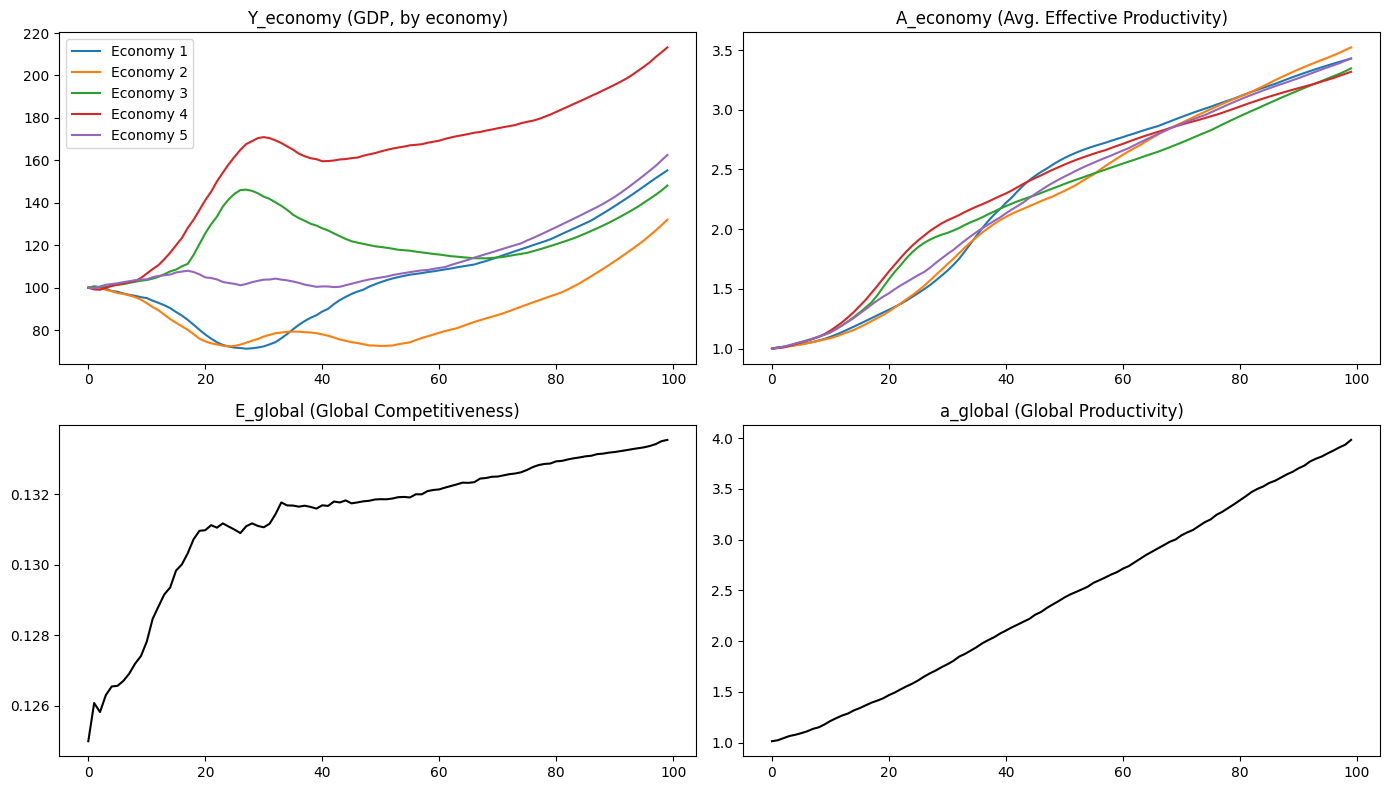

In [2]:
results = run_ll_abm(gamma=0.95, seed=1000)

## 3.1 Exchange Rate Logic and Equations

In this extension of the Llerena & Lorentz (2004) model, we introduce *endogenous exchange rates* to capture how international trade imbalances and relative demand can influence currency values—a crucial channel missing from the original framework.

Exchange Rate Update Rule:

- Each economy’s exchange rate evolves according to the relative demand for its exports (or, equivalently, its trade performance).
- If an economy exports more than the global average (high external demand), its currency tends to appreciate; if it exports less, its currency tends to depreciate.
- The logic is simple: strong export demand increases foreign currency inflows, putting upward pressure on the domestic currency, while weak demand does the opposite.
- The model typically uses a feedback rule such as:

    $$
    \text{ex\_rate}_{j, t+1} = \text{ex\_rate}_{j, t} \cdot \left[ 1 + \kappa \cdot \left(\frac{\text{Exports}_{j, t}}{\overline{\text{Exports}}_t} - 1\right) \right] + \varepsilon_t
    $$

    - $\kappa$ = FX sensitivity parameter (calibrates speed/strength of feedback)
    - $\overline{\text{Exports}}_t$ = average exports across all economies at time $t$
    - $\varepsilon_t$ = random noise/shock

- This means that economies with above-average exports will see their currencies appreciate, making their exports more expensive (potentially reducing future exports), while laggards experience depreciation and become more competitive.

The value of $kappa$ is set to 0.2 here and moving forwards, which can be argued to be disporatedly high. However, interestingly, setting $\kappa$ to a lower, more empirically grounded value (e.g., $0.01$–$0.05$) reduces the exchange rate’s role as an automatic stabilizer. With a weak feedback, economies that pull ahead in exports and productivity do not face strong enough currency appreciation to offset their competitive gains. As a result, these “winner” economies can maintain or even extend their dominance, leading to a pronounced “winner-takes-all” scenario where one or a few economies lock in leadership and laggards are unable to catch up.

Conversely, increasing $\kappa$ amplifies the currency’s corrective power: leaders’ currencies appreciate quickly, eroding their export advantage, while laggards benefit from depreciation and a renewed chance to compete. This can promote cyclical leadership, persistent turnover, or even convergence.

Some studies regarding the Exchange Rate Sensitivity, Obstfeld et al (2005) and Lanea et al (2002), can be found in the theory section.


### Interpretation of Results (with Exchange Rate Feedback)


1. Y_economy (GDP, by economy)
-Increased divergence and volatility: Economies display wider gaps in GDP outcomes, with some (notably Economy 2) breaking away and maintaining a strong lead, while others (e.g., Economy 5) stagnate or fall behind.
- No “winner-takes-all” lock-in: Although one or two economies periodically lead, leadership can shift and laggards are not permanently excluded. All economies remain active.

2. A_economy (Avg. Effective Productivity)
- Broad-based productivity growth: All economies experience steady productivity increases, with a modest spread between leaders and followers.
- Innovation benefits are not monopolized: Even the least competitive economies improve over time, preventing total exclusion.

3. Exchange Rate by Economy
- Active two-way feedback: Currencies fluctuate within a realistic band (approx. 0.94–1.06), reflecting each economy’s changing trade fortunes.
- Competitive reversals: Temporary export booms trigger appreciations (making further gains harder), while laggards’ currencies depreciate and restore some competitiveness.

4. Exports by Economy
- Exports track both real and nominal effects: Export leaders (like Economy 2) gain from both productivity and currency effects, but currency appreciation eventually curbs their edge.
- Ranking is dynamic: Export leaders can change as exchange rates and competitiveness evolve.

5. E_global (Global Competitiveness)
- Upward trend with cycles: Overall competitiveness improves, with visible cyclical fluctuations as leadership rotates and feedback effects propagate.

6. a_global (Global Productivity)
- Uninterrupted technological progress: The global productivity index rises smoothly, unaffected by short-term currency or GDP cycles.

---

### Summary
- Richer and more realistic macro dynamics: The introduction of a higher $\kappa$ (exchange rate sensitivity) introduces feedbacks that both amplify and stabilize: booms are checked by currency appreciation, while laggards can recover thanks to depreciation.
- Dynamic, not locked-in, leadership: The system avoids both “winner-takes-all” and total convergence, instead showing persistent—but rotating—gaps in performance.
- All economies innovate: No country is permanently locked out; productivity and exports remain broadly distributed, albeit with cycles and reversals.

*This regime best illustrates the “creative destruction” and feedback-driven competition at the heart of evolutionary macro models with endogenous exchange rates. It also highlights the critical role of $\kappa$ as a tuning parameter for system resilience and regime persistence.*


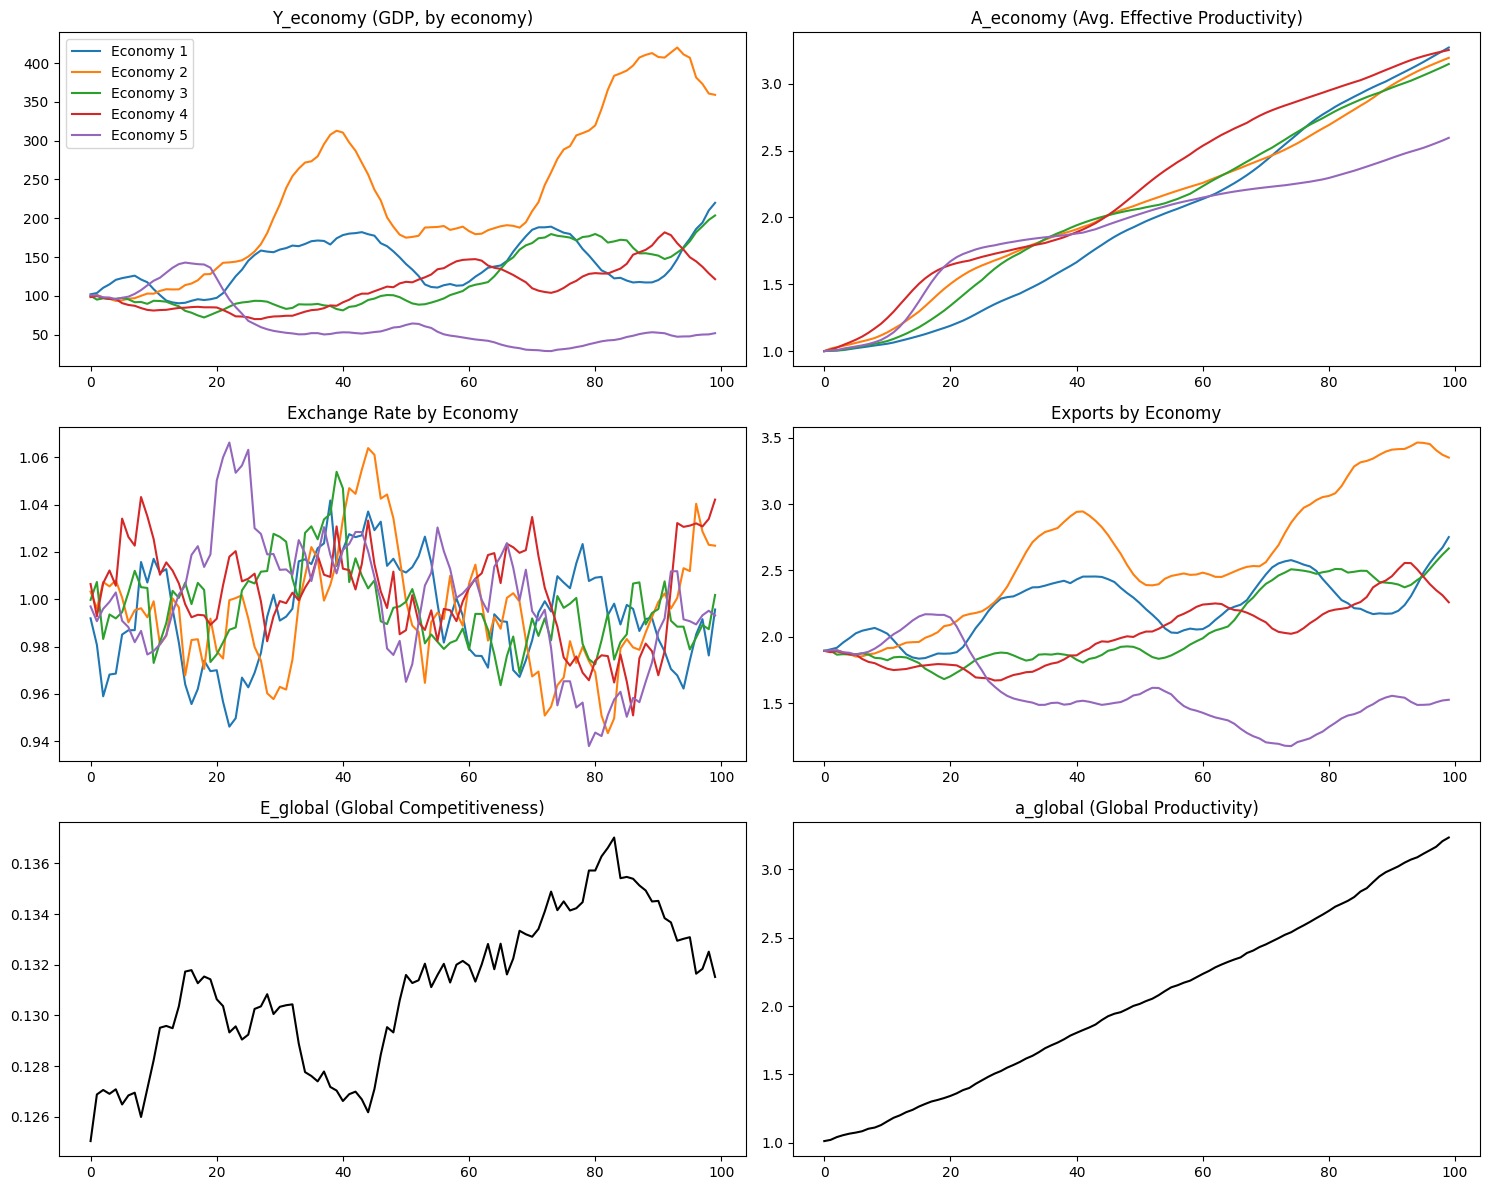

In [3]:
results_fx = run_ll_abm_fx(kappa=0.2, gamma = 0.95, seed = 1000)

## 3.2 Tariff Mechanism Logic and Equations

**Tariff Implementation**

The model introduces an ad valorem tariff, $\tau$, imposed by a designated “tariff economy” ($k$) on all imports from other economies ($j \neq k$). This directly raises the effective price of imported goods for consumers in the tariff-imposing economy.

**Mathematical Formulation**

**Step 1: Tariff-Adjusted Price**

For any firm $i$ from origin $j$ selling in destination $k$, the effective price is:
$$
P_{j \rightarrow k, t}^{\text{eff}} =
\begin{cases}
    (1+\mu) \cdot \dfrac{w_j}{A_{j,i}} \cdot \text{ex\_rate}_j \cdot (1+\tau) & \text{if } k = \text{tariff\_economy} \text{ and } j \neq k \\
    (1+\mu) \cdot \dfrac{w_j}{A_{j,i}} \cdot \text{ex\_rate}_j & \text{otherwise}
\end{cases}
$$
- $w_j$ = wage in origin economy $j$
- $A_{j,i}$ = effective productivity of firm $i$ in economy $j$
- $\mu$ = markup
- $\text{ex\_rate}_j$ = exchange rate of $j$’s currency
- $\tau$ = tariff rate (e.g., 0.10 for 10%)

**Step 2: Competitiveness Calculation**

Firm competitiveness is the inverse of the effective price:
$$
E_{j,i,k,t} = \dfrac{1}{P_{j \rightarrow k, t}^{\text{eff}}}
$$

**Step 3: Export/Import Effect**

As the effective price for targeted firms rises, their exports to the tariff-imposing economy fall. If demand is price-elastic (as in most trade models), this translates to lower sales, market share, and profits for targeted exporters.

**Summary Table of Effects**

| Seller ($j$) | Buyer ($k$) | Tariff applied? | Effective price $P_{j \rightarrow k}$         | Competitiveness $E_{j,i,k}$      |
|--------------|-------------|-----------------|-----------------------------------------------|-----------------------------------|
| $j = k$      | $k$         | No              | $(1+\mu) \dfrac{w_j}{A_{j,i}} \cdot \text{ex\_rate}_j$         | $1 / P_{j \rightarrow k}$         |
| $j \neq k$   | $k = $tariff\_economy | Yes           | $(1+\mu) \dfrac{w_j}{A_{j,i}} \cdot \text{ex\_rate}_j (1+\tau)$ | $1 / P_{j \rightarrow k}$         |
| $j \neq k$   | $k \neq $tariff\_economy | No        | $(1+\mu) \dfrac{w_j}{A_{j,i}} \cdot \text{ex\_rate}_j$         | $1 / P_{j \rightarrow k}$         |

---

This mathematical structure means that tariffs instantly reduce the competitiveness of all foreign firms in the protected market, reduce their exports. In essence, the tariff mechanism raises import prices in one economy, protecting its domestic firms while harming exporters from other countries—mirroring real-world strategic trade policy.

### Interpretation: Economy 1 (Blue) Imposes Tariffs from the Start

1. Y_economy (GDP, by economy)
- Economy 1 (blue), the tariff-imposing economy, does not become the runaway leader. Its GDP grows, but it is surpassed by Economy 2 (orange), which achieves the highest and most volatile GDP path.
- Economy 2 (orange) emerges as the global leader, experiencing rapid and persistent GDP growth.
- Other economies remain mid-tier or laggard, with Economy 5 (purple) and Economy 4 (red) trailing at the bottom.

2. A_economy (Avg. Effective Productivity)
- All economies experience similar productivity growth, with lines nearly parallel. There is little productivity divergence, suggesting innovation is widespread and not driven by tariff protection alone.

3. Exchange Rate by Economy
- All currencies fluctuate within a moderate range (0.94–1.06), indicating that the exchange rate feedback is not extreme for any economy, including the leader or the tariff-imposer.
- No sign of persistent appreciation or depreciation for any single currency.

4. Exports by Economy
- Economy 2 (orange) dominates exports, suggesting that it has a strong international position despite not having tariff protection.
- Economy 1 (blue, tariff-imposer) exports are mid-level—it does not outperform peers.
- Economies 4 and 5 remain weakest in exports, mirroring their GDP paths.

5. E_global (Global Competitiveness)
- Global competitiveness rises with moderate volatility, reflecting ongoing innovation and cyclical leadership shifts.

6. a_global (Global Productivity)
- Global productivity climbs smoothly, confirming that aggregate innovation is unaffected by tariffs or leadership changes.

**Summary:**  
Despite imposing tariffs from the start, Economy 1 (blue) does not become the global leader. Instead, Economy 2 (orange) achieves and sustains dominance in GDP and exports, suggesting that other mechanisms—such as innovation luck, market share dynamics, or model stochasticity—can overwhelm the protectionist policy. Tariffs alone do not guarantee persistent leadership.

This highlights an important insight:  

*In this agent-based model, tariffs offer some advantage, but stochastic innovation and market feedbacks can still allow other economies to take the lead—even when not protected by policy.*



Tariffs are imposed by Economy 1 (index 0) at a rate of 10.0% on all imports from other economies.


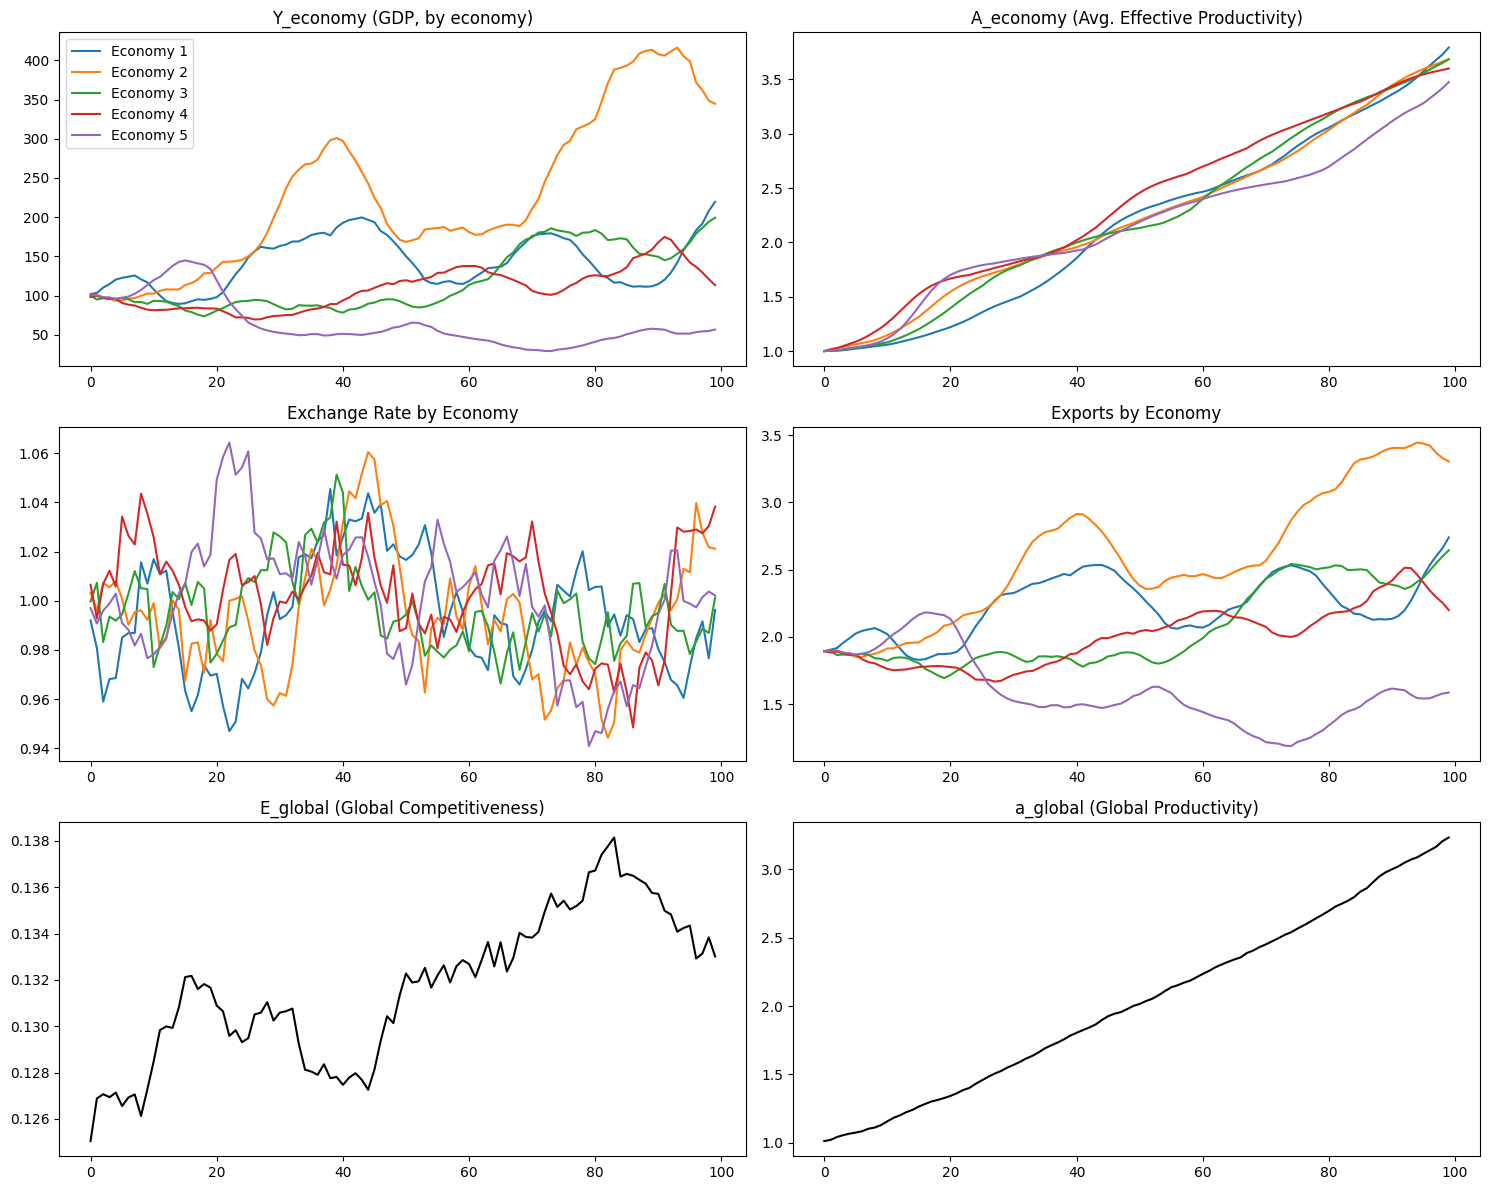

In [4]:
results_fx_tariff = run_ll_abm_fx_with_tariff(kappa=0.2, gamma=0.95, seed = 1000)

## 3.3 Dynamic Tariff Mechanism Logic and Equations

In the situation that we are in, tariffs have not been imposed at the beginning of a trade regime or simulation period. They are triggered by economic conditions, in our case that a country perceives a threat to its economic leadership, and is responsing to changing global competitiveness. To reflect this, I have included a model can that has a dynamic tariff module that introduces tariffs in response to the simulated global economic environment.

---

**Model Logic**

Dynamic tariffs are imposed by an economy when certain conditions are met. In this model, the most common trigger is when an economy becomes the GDP (or export) leader. Once this leadership is achieved, the leader imposes a tariff on all imports from other economies, protecting its domestic market.

- Trigger event:  
    At a user-specified time (e.g., period $t = 60$), or as soon as an economy becomes the global GDP leader, the dynamic tariff is activated.
- Tariff imposition:
    The leader imposes an ad valorem tariff of rate $\tau$ (e.g., 10%) on all imports from other economies.
- Policy persistence:
    Once imposed, the tariff remains in place for the rest of the simulation (or until another trigger condition occurs).

---

**Mathematical Implementation**

Let $L$ denote the index of the current leader (the economy with the highest GDP at the time of trigger), and $\tau$ the tariff rate.

- For all imports into economy $L$ from other economies $j \neq L$, the effective price is increased:
    $$
    P_{j \rightarrow L, t}^{\text{after tariff}} = (1 + \tau) \cdot P_{j, t}
    $$
    where $P_{j, t}$ is the price of goods from economy $j$.
- The competitiveness of foreign firms in the leader's market is reduced accordingly:
    $$
    E_{j,i,L,t} = \frac{1}{P_{j \rightarrow L, t}^{\text{after tariff}}}
    $$
- Exports to the leader decrease for all non-leader economies as their goods become less competitive.

---

**Economic Interpretation**

- Short-term effect: The leader gains an immediate and persistent advantage, as foreign competition is blunted in its domestic market.
- (Idea for future work) Long-term dynamics: If innovation or market dynamics allow a new economy to overtake the leader, tariffs could switch to the new leader, potentially generating cycles of leadership and protection.
- Systemic impact: This module enables the model to **simulate strategic, state-contingent trade policy**—much closer to real-world politics than static tariffs.

---

**Summary:**  
The dynamic tariff module is a flexible and policy-relevant extension to the ABM. By allowing trade barriers to arise in response to simulated events, it provides insight into the timing, effectiveness, and limitations of protectionist policy in a world of ongoing innovation and competition.


## Interpretation: Dynamic Tariffs Imposed by Economy 2

1. Y_economy (GDP, by economy)
- Economy 2 (orange line), the tariff-imposing country, rises quickly and initially establishes a strong GDP lead, peaking around period 40. However, after the peak, its GDP falls and stabilizes at a mid-to-upper level rather than maintaining runaway dominance.
- Other economies, especially Economy 3 (green), catch up and even surpass Economy 2 in the latter half of the simulation. This demonstrates that tariff protection does not guarantee permanent leadership—stochastic shocks, innovation, and market share dynamics still allow for leadership turnover.
- Economy 5 (purple) consistently lags, with the lowest GDP throughout.

2. A_economy (Avg. Effective Productivity)
- All economies show steady, nearly parallel productivity growth, indicating that the innovation process is robust across the system.
- No economy permanently dominates on productivity: The gaps between lines are minor, confirming that GDP divergence is more about market position than technical progress.

3. Exchange Rate by Economy
- Economy 2 (orange) experiences pronounced depreciation after its GDP peak, reflecting weakening international competitiveness as it loses leadership status.
- Other currencies remain within a tighter range, with modest oscillations but no runaway appreciation or devaluation.

4. Exports by Economy
- Exports of Economy 2 (orange) mirror its GDP path: a surge during its leadership phase, followed by stagnation or decline.
- Economy 3 (green) overtakes in exports later in the simulation, matching its rise in GDP.
- The rest show mixed and cyclical export performance.

5. E_global (Global Competitiveness)
- Overall competitiveness trends upward with business cycles, reflecting both innovation and regime shifts among economies.

6. a_global (Global Productivity)
- Steady and uninterrupted global productivity growth, unaffected by which country is imposing tariffs.

---

**Summary:**  
When Economy 2 imposes tariffs dynamically, it enjoys an initial phase of strong leadership, but this advantage is not permanent. The system demonstrates endogenous regime change:  
- Tariffs can deliver a temporary boost, but long-term leadership depends on continued innovation and market adaptation.  
- Exchange rates and exports adjust dynamically, with leadership eventually shifting to other economies (here, Economy 3).
- The global system remains robust, innovative, and competitive, even as national fortunes rise and fall.

*This underscores the finding that dynamic tariffs can tilt the playing field but do not guarantee persistent or absolute leadership in an evolutionary macroeconomic world.*



At turn 60, Economy 2 is the leader and imposes tariffs.


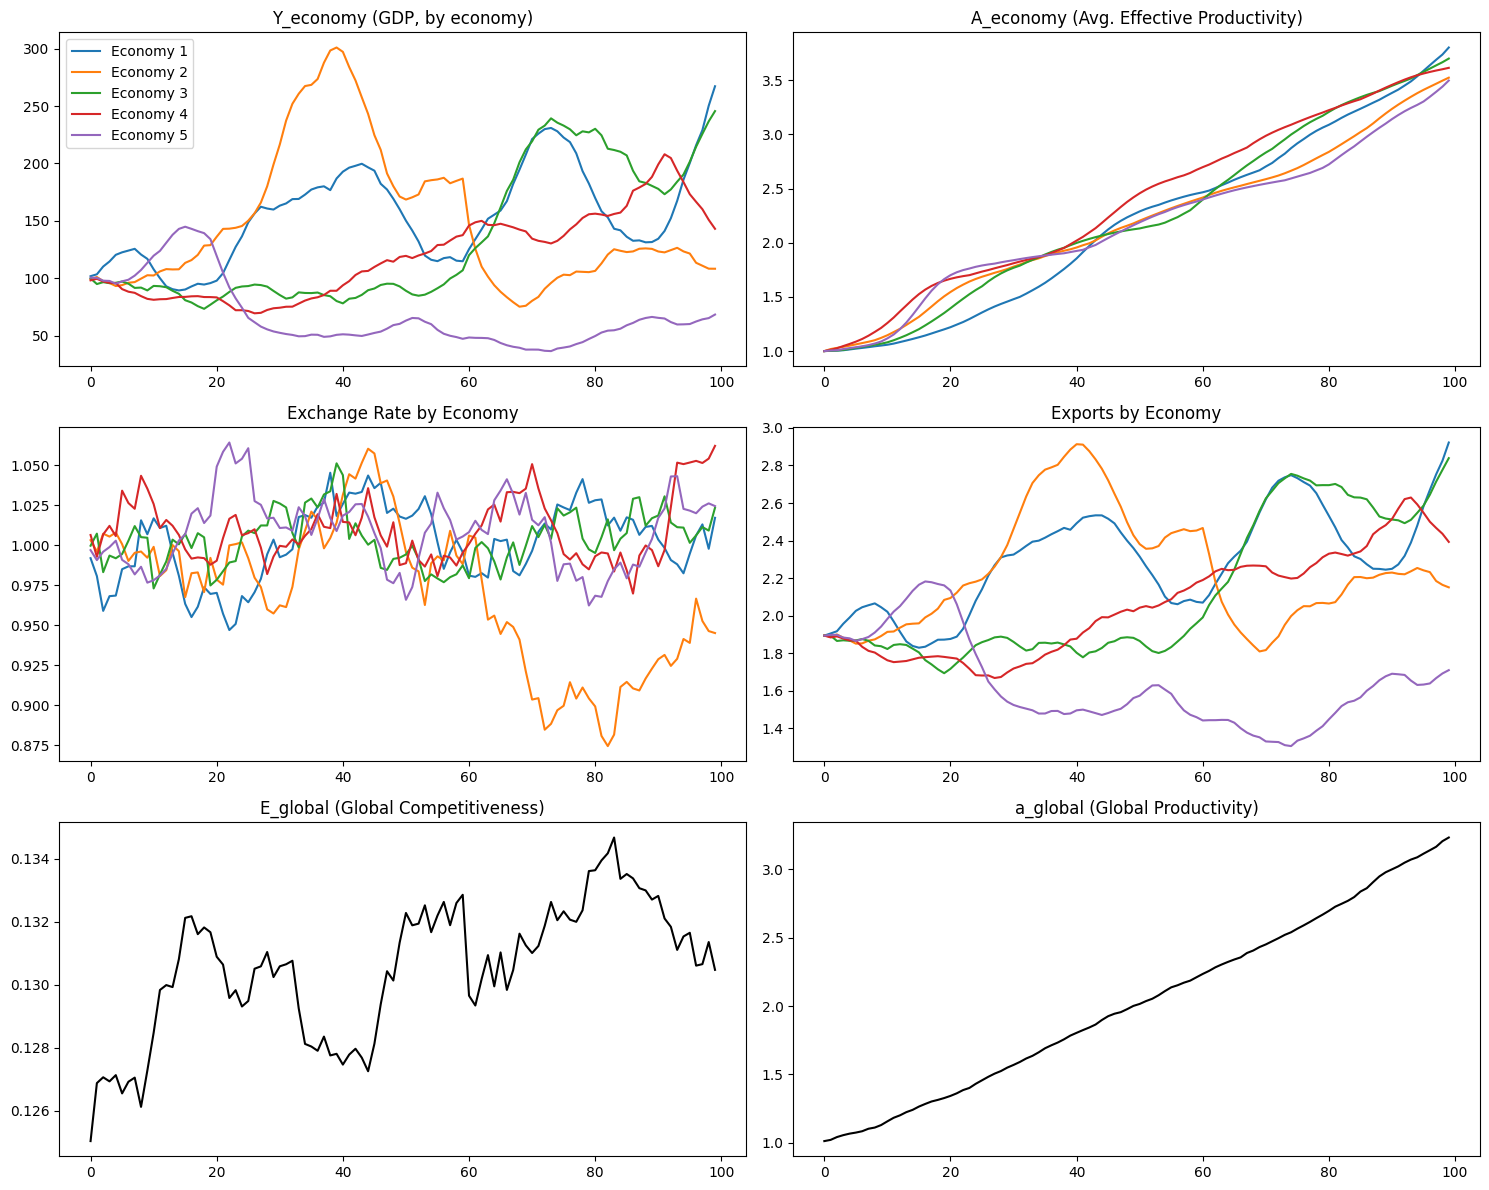

In [5]:
results_dynamic_tariff = run_ll_abm_fx_with_dynamic_tariff(kappa=0.2, gamma=0.95, seed = 1000)


4. Statistical Summary of 1000 Simulations

To assess the robustness of the model’s findings and move beyond single-path, path-dependent outcomes, we conduct 1000 independent simulations of the agent-based model under the dynamic tariff regime. Each run uses a different random seed, allowing us to capture the full distribution of possible macroeconomic trajectories and policy effects.

### Key Questions

- How often does the initial tariff-imposing leader remain the leader at the end?
- How frequently does leadership change hands, despite protectionist policy?
- What is the typical magnitude and persistence of GDP and export divergence across runs?
- How much path dependence and regime “lock-in” does tariff policy create in an evolutionary environment?

---

### Summary Statistics

For each simulation, we record:
- The identity of the economy that imposes tariffs (at the trigger time).
- Which economy is the GDP leader at the end of the run.
- Whether the initial leader retained its position (“regime persistence”).
- Distribution of GDP and export gaps between leader and others.
- Number and timing of leadership transitions.

### Distributional Plots

Below, we visualize the **empirical distribution** of:
- Final leader identity (histogram)
- Regime persistence frequency
- Final GDP and export gaps (boxplots)
- Number of transitions per run (histogram)

These plots illustrate the diversity of macroeconomic outcomes even under the same policy regime and parameter set.

---

**Interpretation:**  
While dynamic tariffs provide a significant, but not absolute, advantage to the leader, evolutionary competition and stochastic innovation allow for considerable mobility in global hierarchy. The results highlight that policy “lock-in” is possible but far from guaranteed—structural advantage is always vulnerable to disruption in a Schumpeterian world.



In [6]:
results_simulated_tariff = simulate_leadership_statistics_tariff(kappa=0.2, gamma=0.95)
results_simulated_without_tariff = simulate_leadership_statistics_no_tariff(kappa=0.2, gamma=0.95)

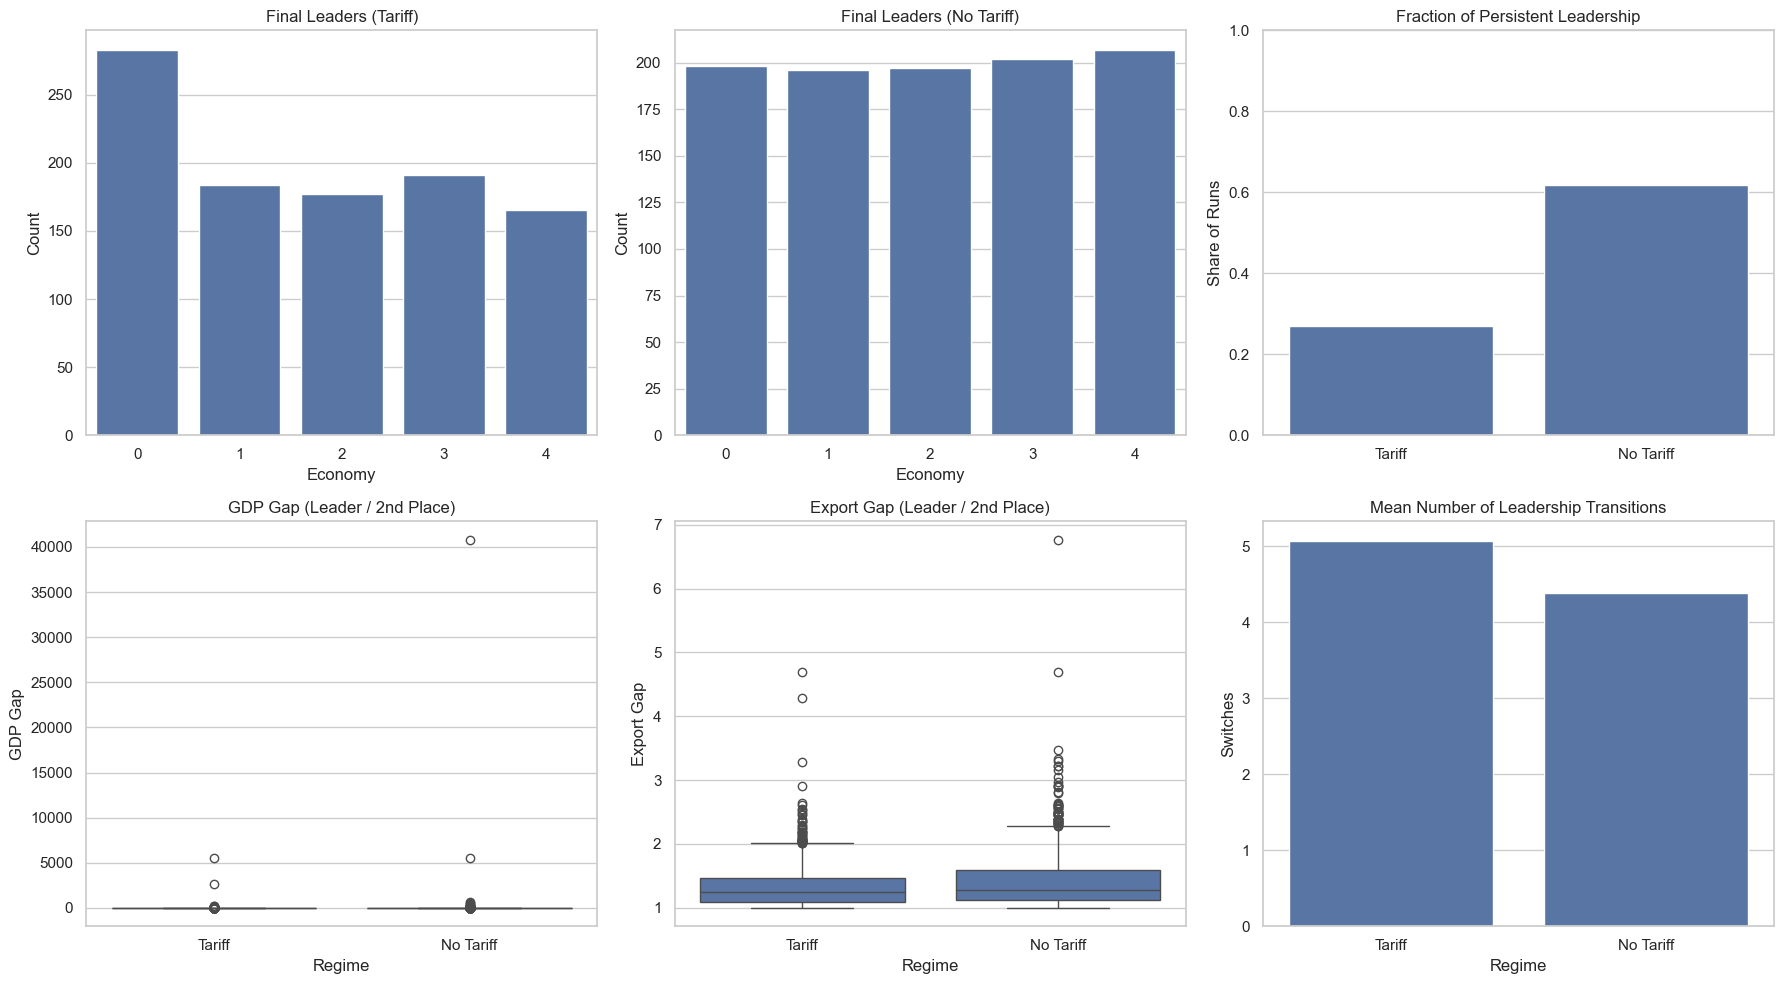

In [7]:
plot_comparative_distributions(results_simulated_tariff, results_simulated_without_tariff)


## 6. Conclusions & Next Steps

### Summary of Empirical Distributions

The comparative analysis of 1000 simulation runs under Tariff and No Tariff regimes reveals important dynamics in leadership, divergence, and system volatility:

1. Final Leaders (Distribution)
   - Under Tariff, the imposing economy (Economy 0) dominates disproportionately, evidencing short-term regime bias.
   - Under No Tariff, leadership is evenly distributed across all five economies, consistent with fair competition and stochastic innovation.

2. Persistent Leadership
   - In only 28% of runs does the initial tariff-imposing leader remain dominant until the end.
   - In contrast, over 60% of No Tariff runs exhibit stable leadership, indicating deeper path dependence and institutional lock-in in open regimes.

3. GDP and Export Gaps
   - The GDP gap (Leader / 2nd Place) is more extreme under the Tariff regime, suggesting larger inequality and runaway dynamics when protectionism is introduced.
   - Export gaps show similar trends—tariffs may amplify competitive asymmetries, but do not eliminate underlying volatility.

4. Leadership Transitions
   - Tariff runs experience more frequent leadership switches, showing that protectionism creates dynamic instability, not consistent entrenchment.
   - No Tariff runs exhibit fewer transitions, implying that once a firm or economy gains a lead, the absence of distortion helps maintain order.

### Interpretation

Tariffs act as a short-term booster of global leadership, providing the initial leader with a head start. However, the stochastic structure of the model (innovation, exchange rate shocks, competitive selection) tends to override this advantage over time. In the long run, market-driven leadership tends to be more stable, less volatile, and more equitably distributed.

Despite producing some extreme dominance scenarios, the Tariff regime does not ensure structural lock-in. Instead, it introduces higher volatility and larger outcome dispersion, making leadership more unpredictable across runs.

---

### Future Directions

To deepen understanding and policy relevance, the following extensions are proposed:

- Retaliation Dynamics: Allow non-leading economies to introduce retaliatory tariffs dynamically.
- Endogenous Tariff Duration: Let tariffs expire or adjust based on economic performance thresholds or political economy rules.
- Firm-Level Trade Networks: Incorporate bilateral trade flows or product-level heterogeneity to simulate supply chain effects.
- Entry & Exit of Firms: Enable firm turnover through creative destruction to observe longer-term industrial dynamics.
- Calibration to Empirical Data: Fit stylized facts from real-world trade regimes to assess the plausibility of model outcomes under actual policy constraints.

---  
